# Описание проекта

Проект - изучение оттока клиентов фитнес-центра «Культурист-датасаентист» и подготовка плана действий по удержанию клиентов

Цели исследования:

1) научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

2) сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

3) проанализировать основные признаки, наиболее сильно влияющие на отток;

4) сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
  - выделить целевые группы клиентов;
  - предложить меры по снижению оттока;
  - определить другие особенности взаимодействия с клиентами.

Ход исследования: 

1) Исследовательский анализ данных (EDA);

2) Модель прогнозирования оттока клиентов;

3) Кластеризация клиентов; 

4) Общие выводы и рекомендации.
    

# Описание данных

Файл с данными: '/datasets/gym_churn.csv'

Набор данных включает следующие поля:

1) Данные клиента за предыдущий до проверки факта оттока месяц:

    - 'gender' — пол;
    - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать 
    скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промокод от знакомого 
    при оплате первого абонемента);
    - 'Phone' — наличие контактного телефона;
    - 'Age' — возраст;
    - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

2) Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

    - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    - 'Group_visits' — факт посещения групповых занятий;
    - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический 
    и массажный салон.
    - 'Churn' — факт оттока в текущем месяце.

## Исследовательский анализ данных (EDA)

### Изучение датасета, средние значения и стандартные отклонения

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# Приведем названия столбцов к нижнему регистру для удобства
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [5]:
data.shape

(4000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Все признаки и их значения присутствуют, пропусков нет.

In [7]:
# Проверка на дубликаты
data.duplicated().sum()

0

In [8]:
# Посмотрим на данные с помощью describe()
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Средние значения признаков в двух группах

In [9]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [10]:
churn = data.query('churn!=0').mean().reset_index()
no_churn = data.query('churn==0').mean().reset_index()
churn_pivot = churn.merge(no_churn, on='index')
churn_pivot.columns=['Признаки', 'Среднее в оттоке', 'Среднее в оставшихся']
churn_pivot

,Признаки,Среднее в оттоке,Среднее в оставшихся
0,gender,0.510839,0.510037
1,near_location,0.768143,0.873086
2,partner,0.355325,0.534195
3,promo_friends,0.183789,0.353522
4,phone,0.902922,0.903709
5,contract_period,1.728558,5.747193
6,group_visits,0.268615,0.464103
7,age,26.989632,29.976523
8,avg_additional_charges_total,115.082899,158.445715
9,month_to_end_contract,1.662582,5.283089


В целом у клиентов в оттоке меньшая активность и меньше дополнительные затраты

###  Столбчатые гистограммы и распределения признаков

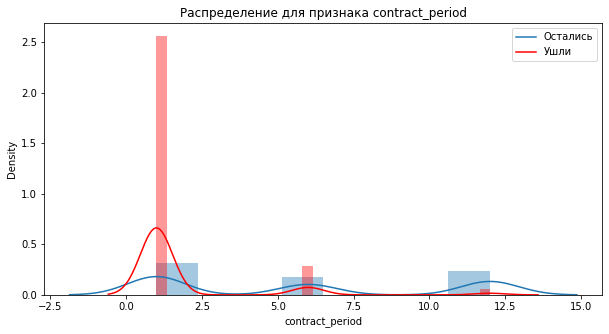

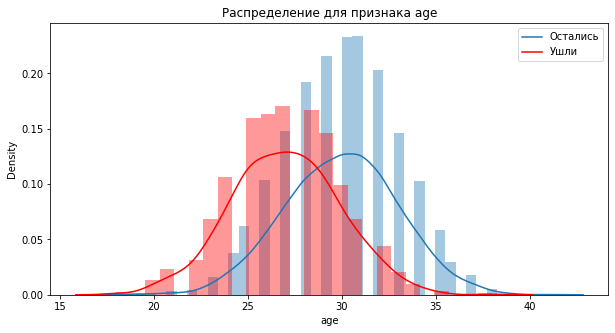

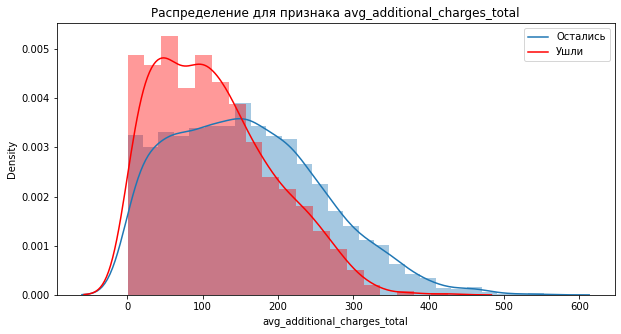

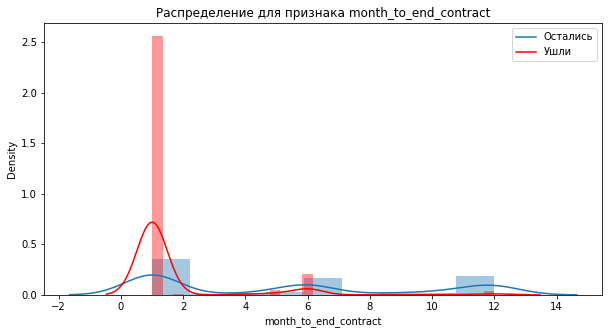

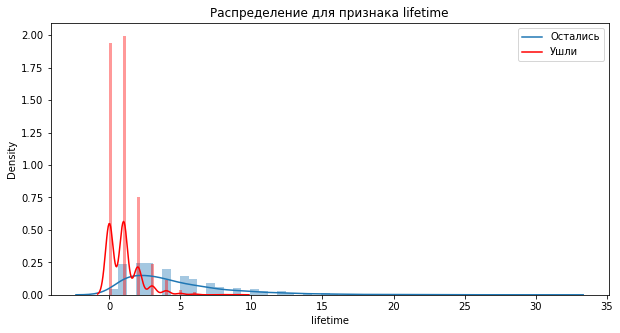

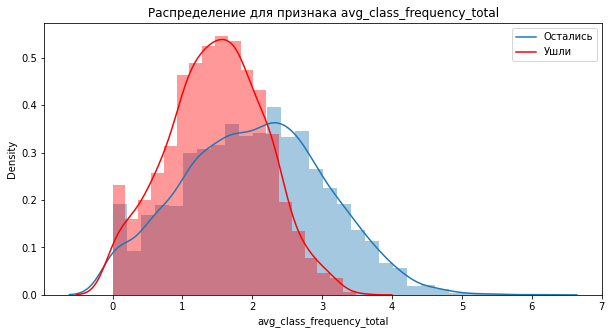

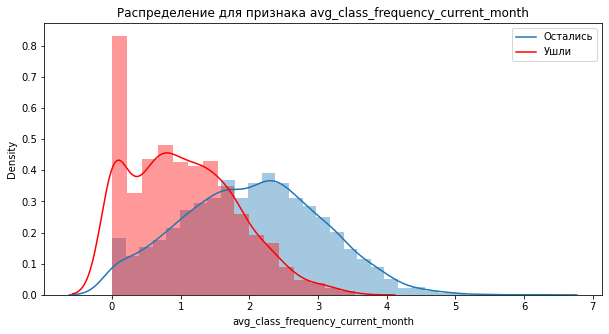

In [11]:
# Cтолбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
# Небулевые (численные) признаки
int_features = data.drop(columns =(['gender', 'near_location',
                                    'partner', 'promo_friends', 
                                    'phone','group_visits','churn'])).columns
for col in int_features:
    plt.figure(figsize=(10, 5))
    sns.distplot(data.query('churn==0')[col])
    sns.distplot(data.query('churn!=0')[col], color = 'r')
    plt.legend(labels = ('Остались', 'Ушли'))
    plt.title('Распределение для признака ' + col)
    plt.show()

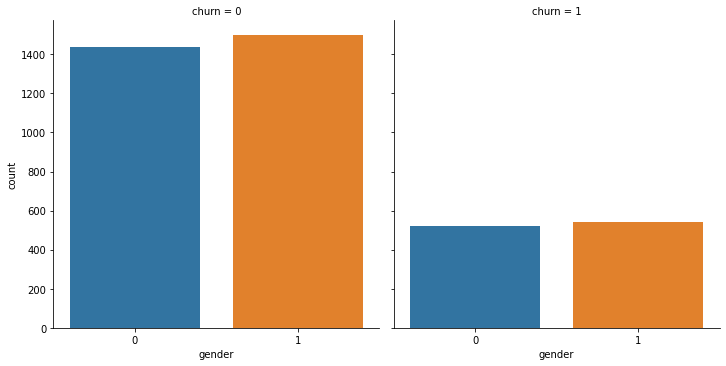

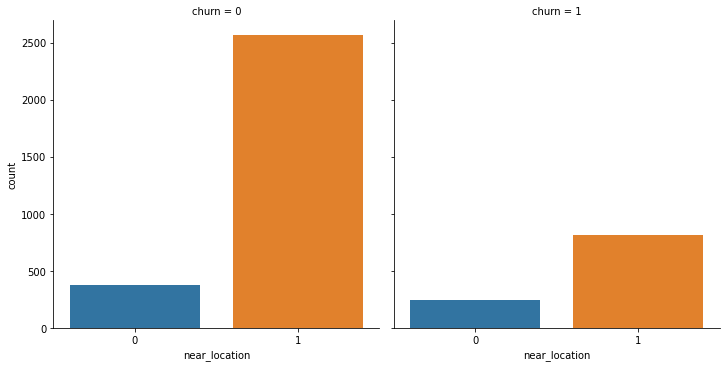

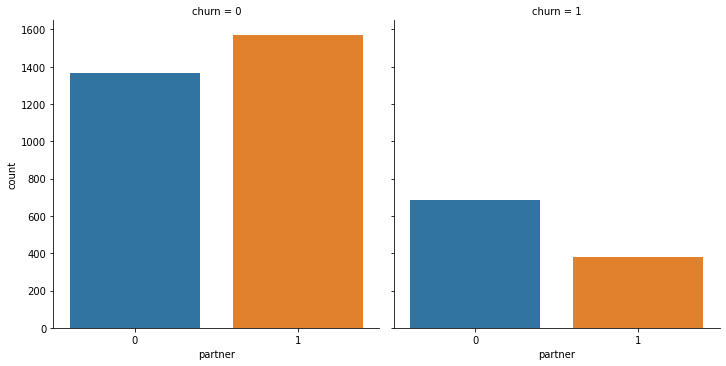

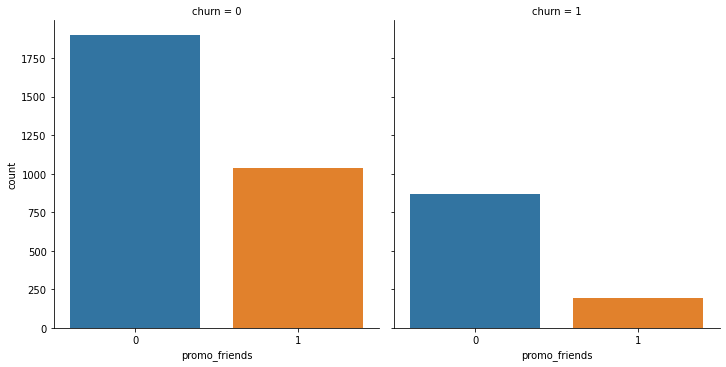

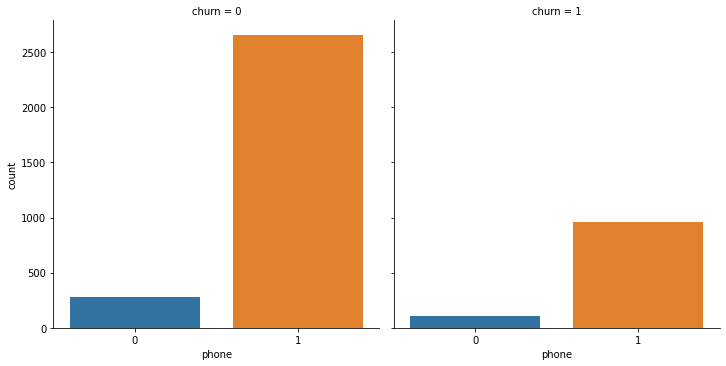

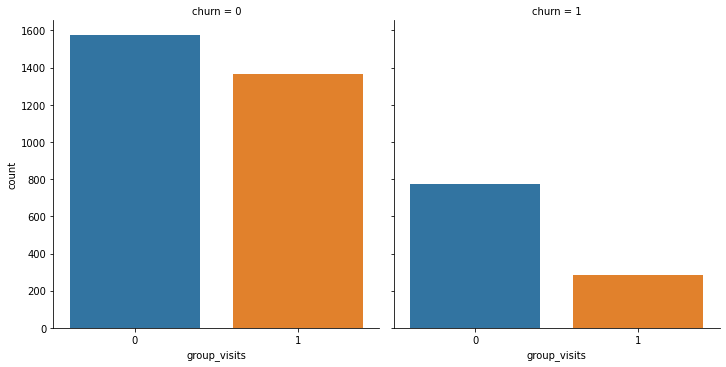

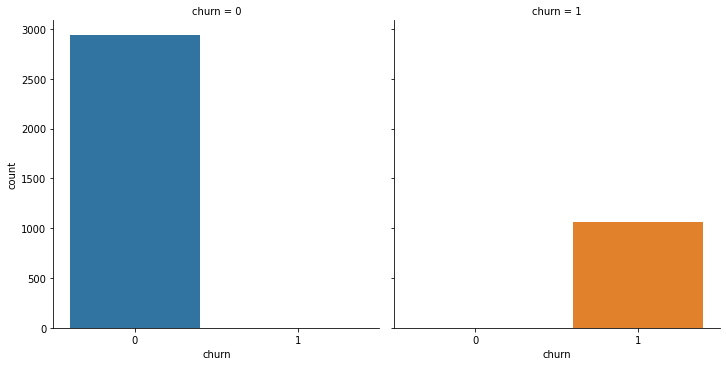

In [12]:
# Булевые признаки
bool_features = data[['gender', 'near_location', 'partner','promo_friends', 'phone', 'group_visits', 'churn']]
for col in bool_features.columns:
    sns.catplot(col, col="churn", data = bool_features, kind="count", height=5)


Можно отметить следующие признаки ушедших клиентов (попавших в отток): 
- Молодые уходят чаще, чем взрслые;
- Клиенты из оттока тратят меньше;
- Клиенты в оттоке, в основном, покупают абонемент на один месяц;
- Клиенты в оттоке реже посещают групповые занятия;
- Если клиент ходил в зал больше 5 ммесяцев, то его уход почти равен нулю;
- Клиенты в оттоке обычно  посещают зал от 1 до 2 раз в неделю;
- Если клиент ни разу не посетил зал за месяц, то вероятнее всего он больше не вернется, если же посетил зал больше 4-х раз, то вероятнее всего он станет постоянным клиентом

### Матрица корреляций признаков

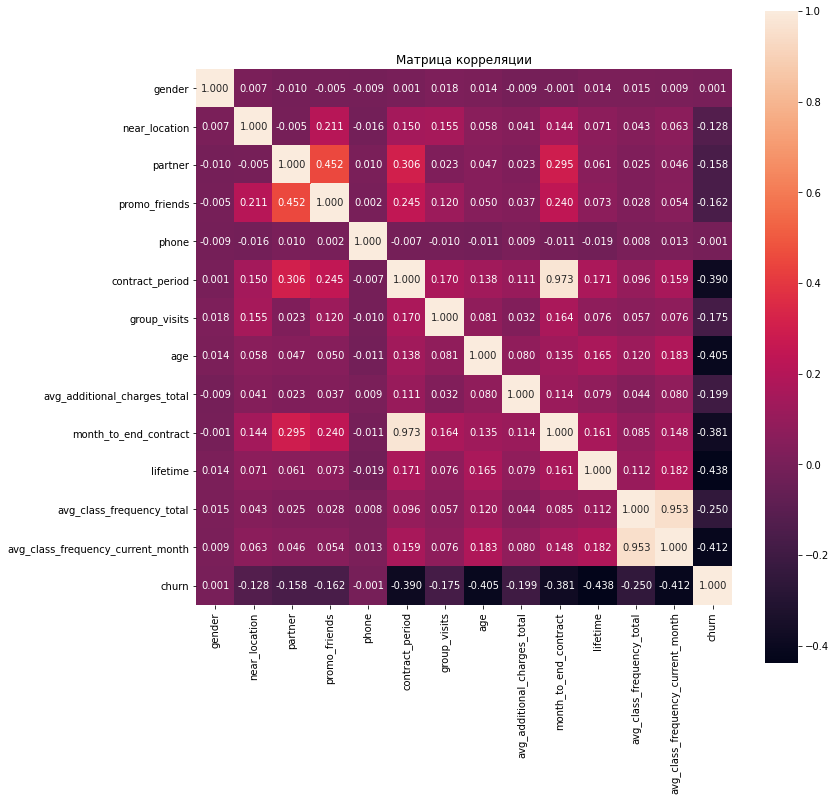

In [13]:
cm = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt = '.3f', square=True)
plt.title('Матрица корреляции')
plt.show()

Большая корреляция у contract_period и month_to_end_contract, a также у avg_class_frequency_total и avg_class_frequency_current_month неудивительна, так как это по сути одинаковые показатели. Можно отметить более заметное влияние признаков partner и promo_friends. Так как это посетители, пришедшие по акции, то и неудивительно что они реже бросают. 

## Модель прогнозирования оттока клиентов 

### Обучающая и валидационная выборки, функции метрик

In [14]:
# Разобьем на выборки
X = data.drop('churn', axis = 1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(3200, 13)
(800, 13)


(3200,)

(800,)

Разделение 80:20 соблюдено

In [16]:
# Функции метрик accuracy, precision и recall 
def show_all_metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

### Логистическая регрессия и случайный лес 

In [17]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
show_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [18]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
show_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


У обоих моделей очень высокий показатель доли верно угаданных ответов из всех прогнозов (Accuracy > 0,91), а также высокие показатели точности и полноты (Precision и Recall > 0,82).

В целом обе модели показали вполне отличные результаты, "Логистическая регрессия" - немного лучше.

## Кластеризация клиентов    

### Стандартизация данных и построение дендрограммы

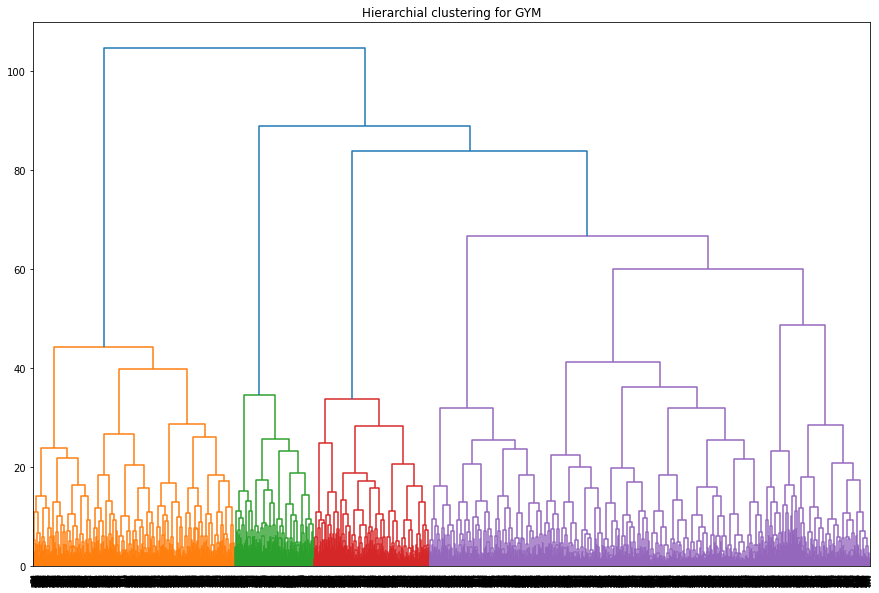

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

### Модель кластеризации способом K-Means 

In [20]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc) 
data['cluster_km'] = labels

In [21]:
# Средние значения признаков по кластерам. Доля оттока по кластерам
clusters = data.groupby(['cluster_km']).mean()
clusters.sort_values(by='churn', ascending=False)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723


Самая высокая доля оттока у 3-го кластера - 51%. В среднем посетители из 3-го кластера это живущие поблизости, моложе остальных, заключают контракт на пару месяцев, ходят один раз в неделю, и меньше остальных тратят на дополнительные услуги.

Самая низкая доля оттока у 0-го кластера - 3%. В основном это люди пришедшие по акции либо купившие абонемент со скидкой, с самым высоким показателем 'lifetime', заключившие договор на почти на год, охотно посещающие групповые занятия, занимаются в среднем 2 раза в неделю. 

Больше других тратят на дополнительные услуги клиенты из 4-го кластера. Также это самая возрастная группа с очень низкой долей оттока - 7%.

Интересно отметить, что в 1-й кластер попали посетители, которые не оставляют свой номер телефон - признак 'phone' равен нулю.



### Распределения признаков по кластерам 

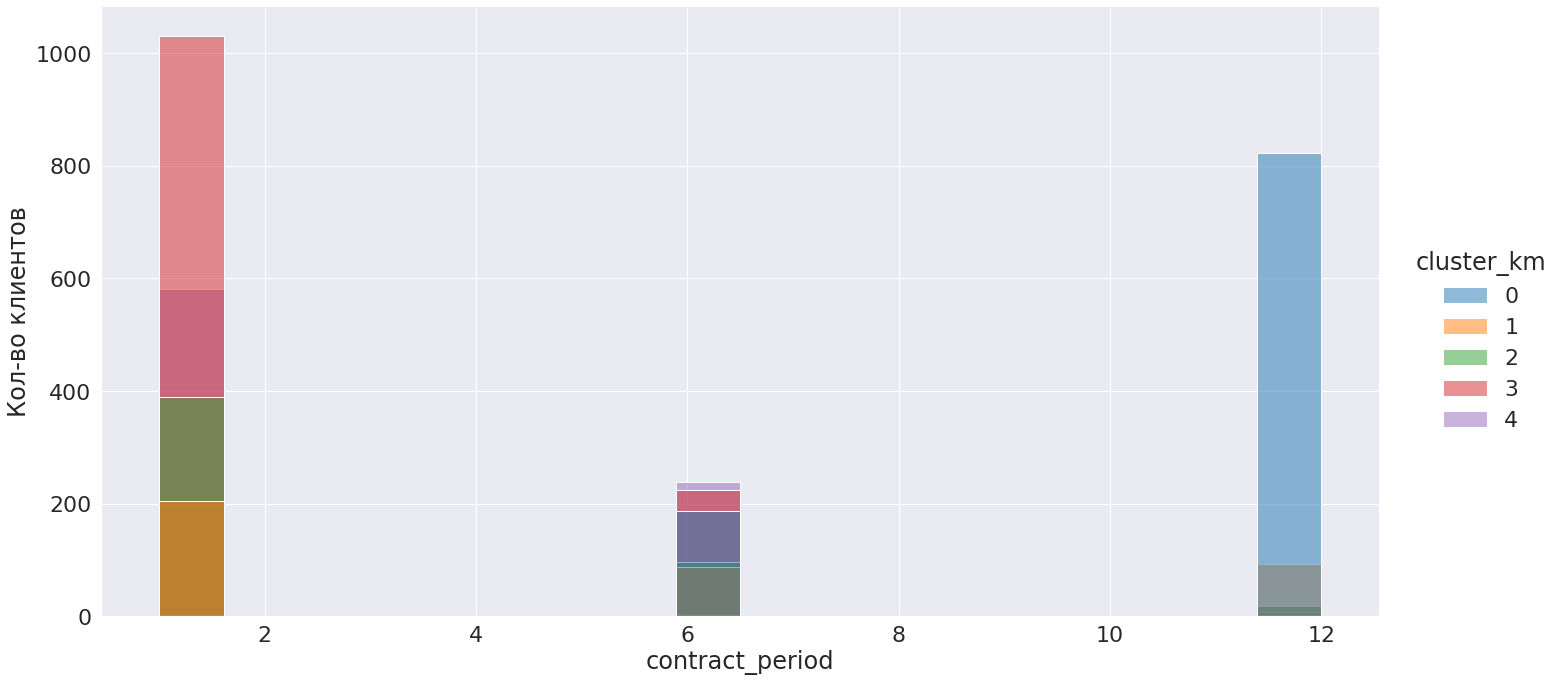

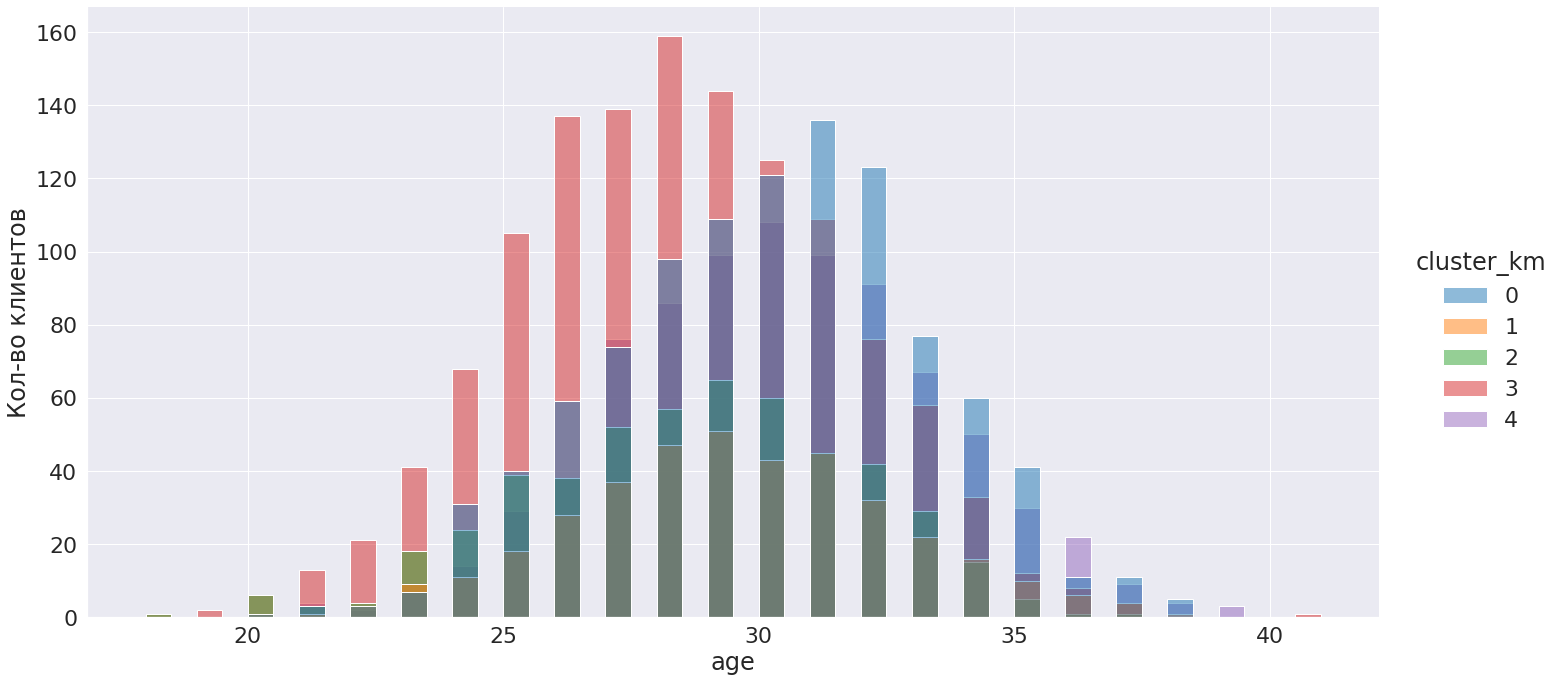

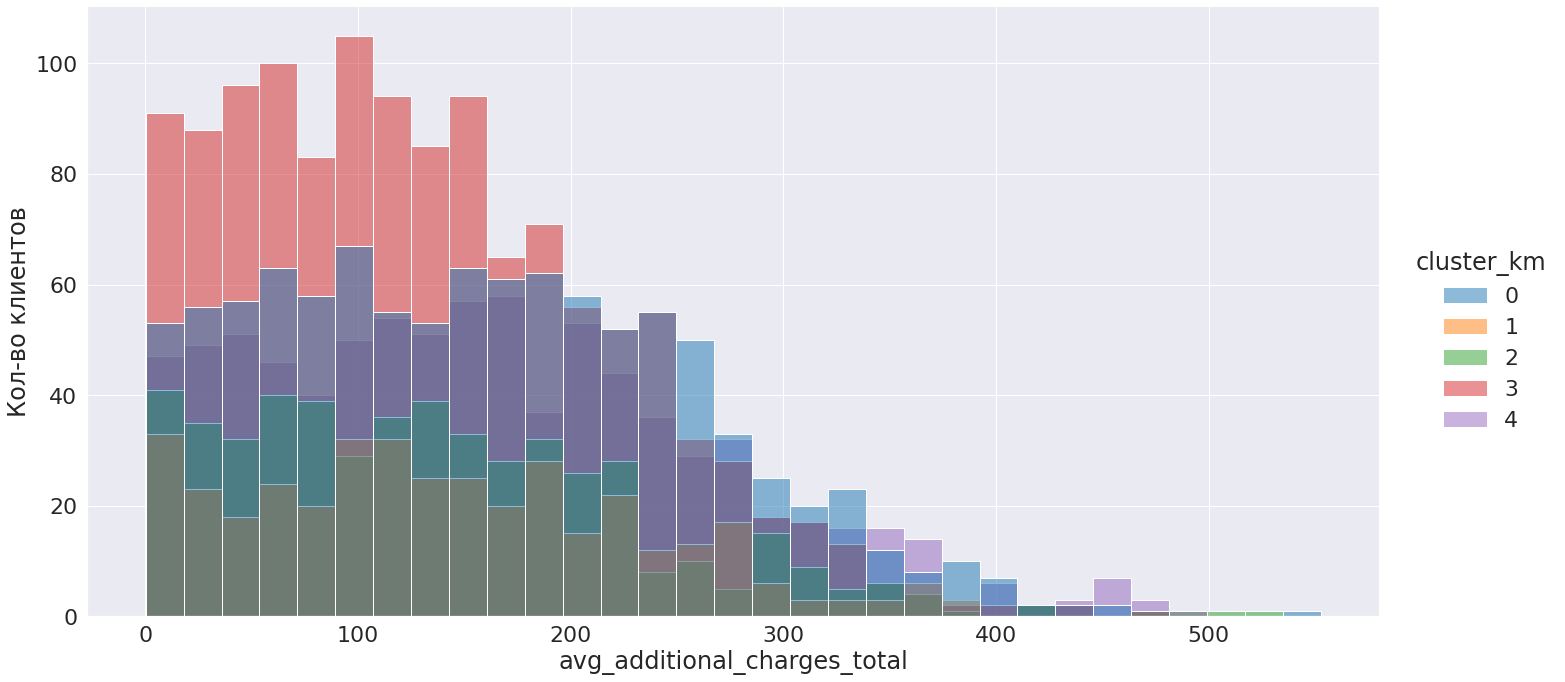

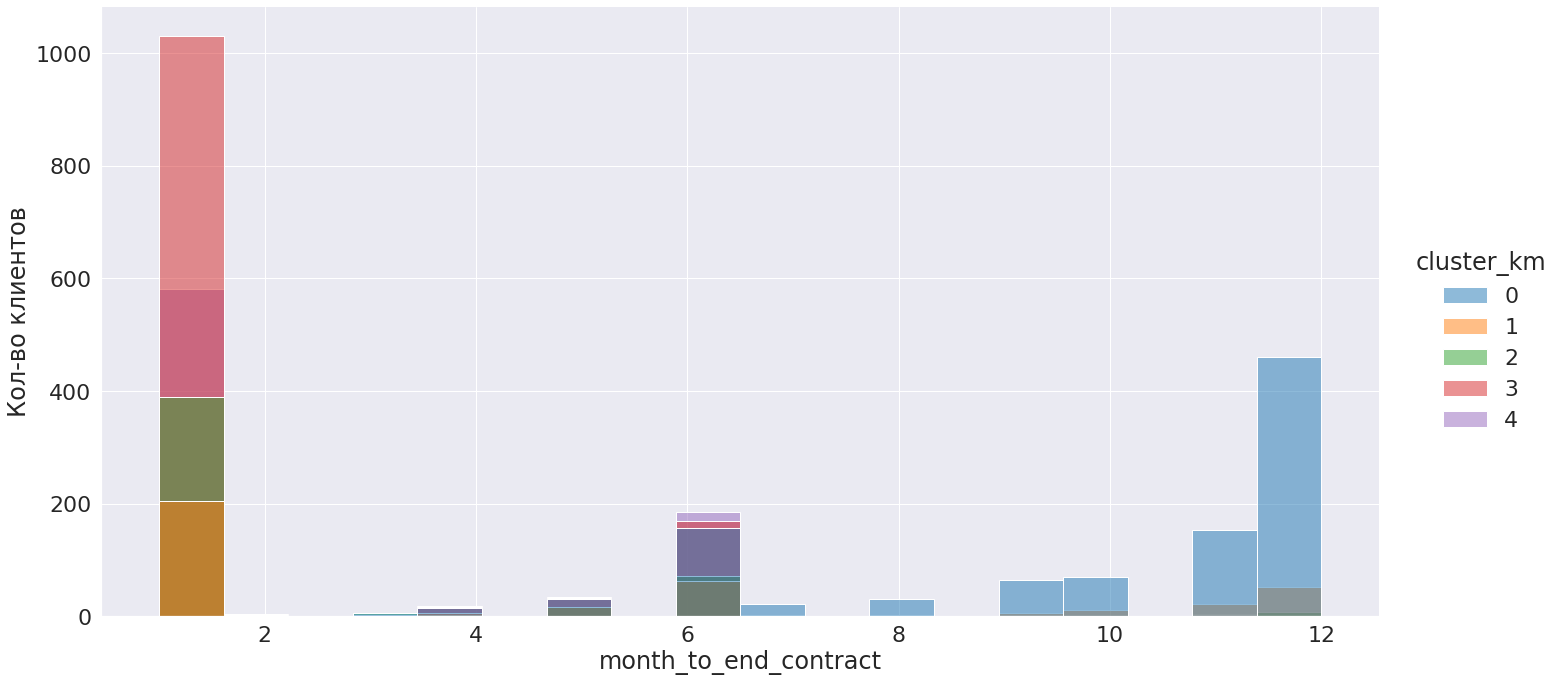

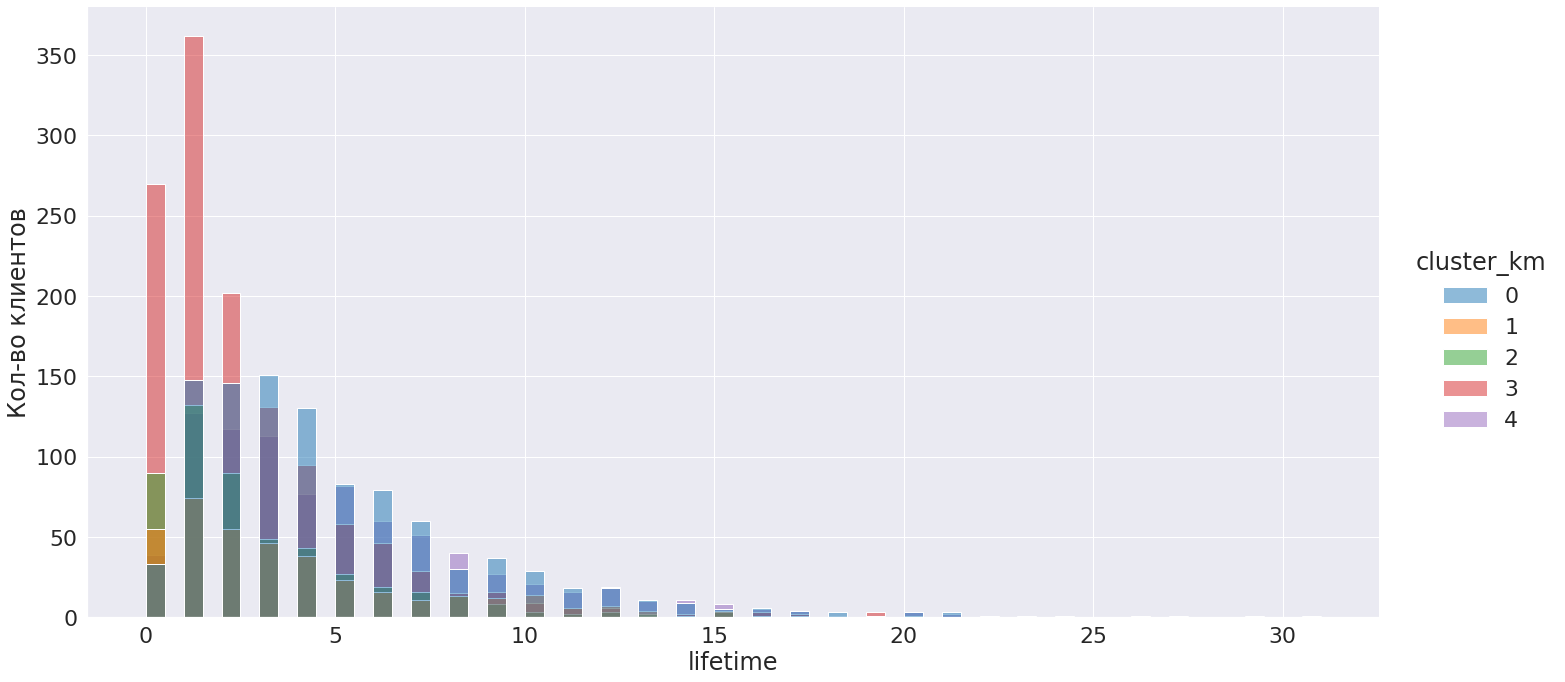

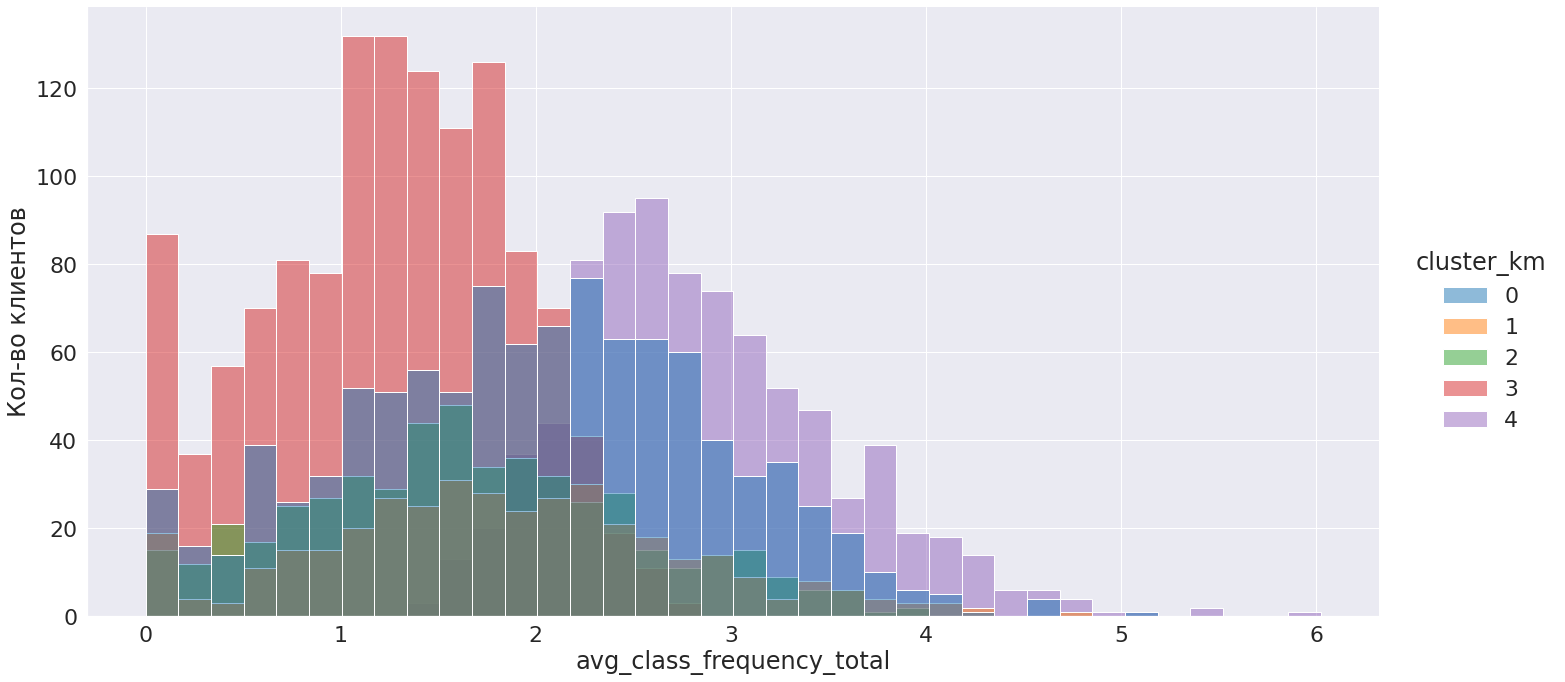

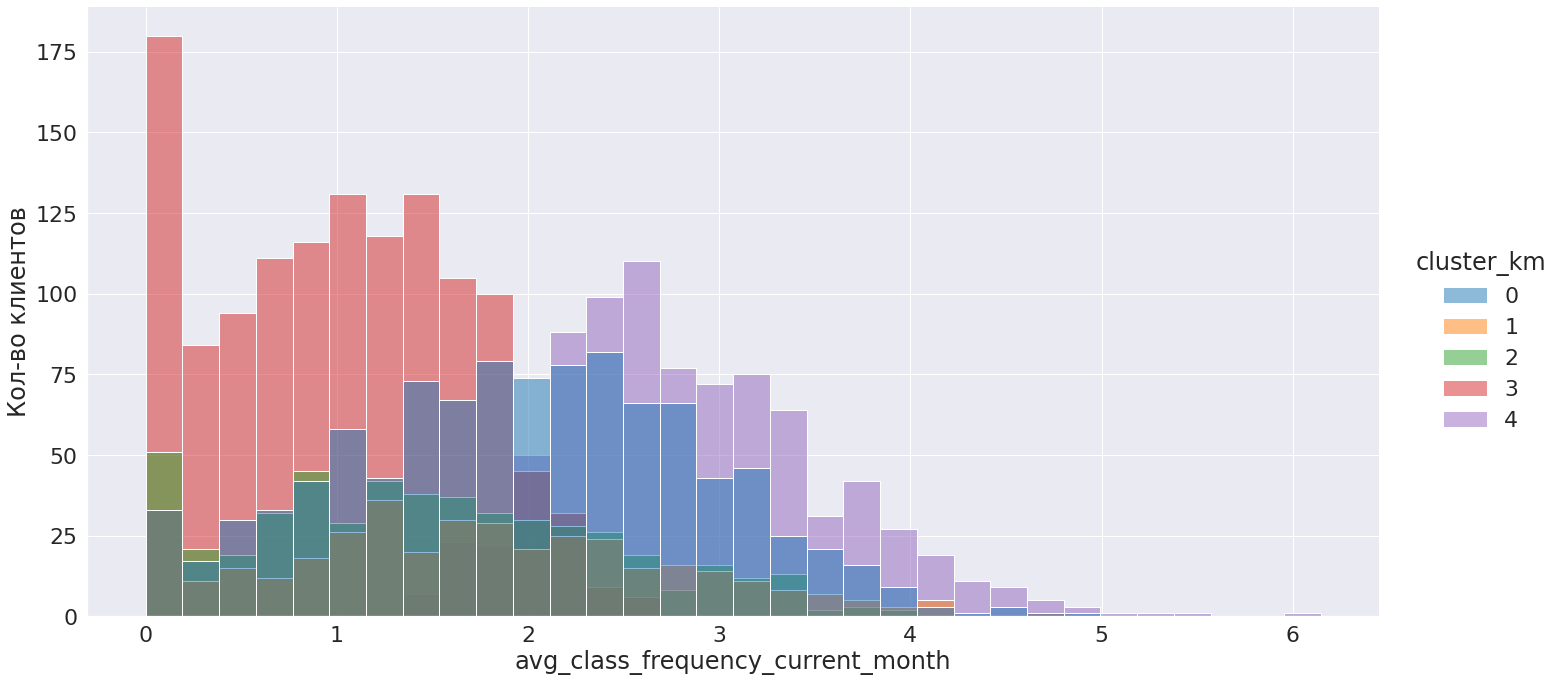

In [22]:
# Респределения небулевых признаков
non_bool = data.drop(columns=(['gender','near_location','partner','promo_friends','phone','group_visits','cluster_km','churn']))
for n in non_bool:
    sns.set(font_scale=2)
    sns.displot(data, x=data[n], hue='cluster_km', palette="tab10", kind='hist', height=10, aspect=2)
    plt.ylabel("Кол-во клиентов")
    plt.show()


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Классная работа с графиками!
    
</div>


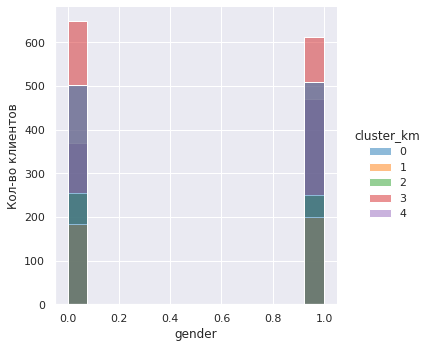

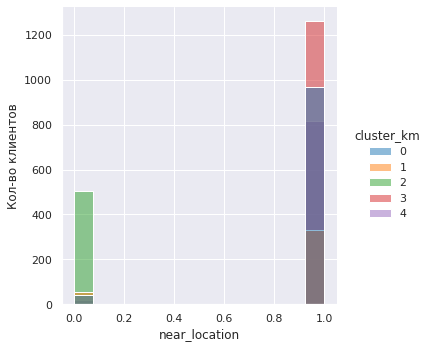

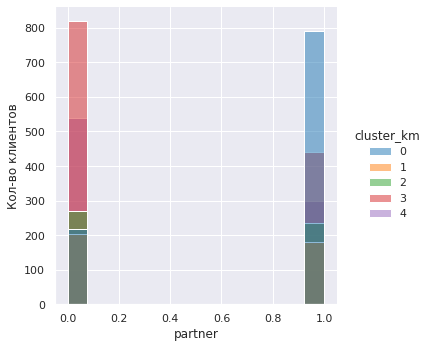

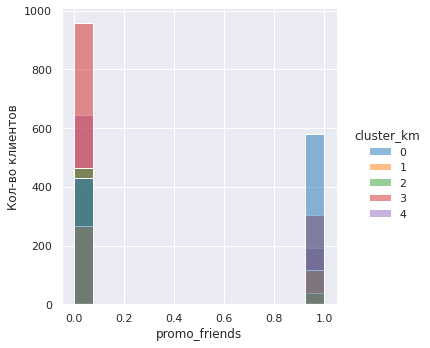

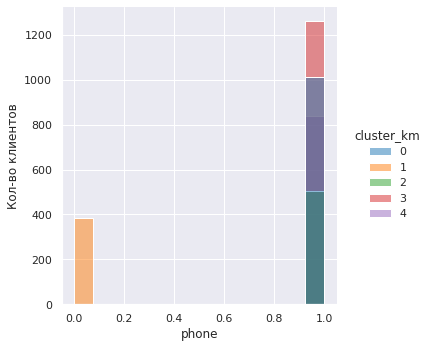

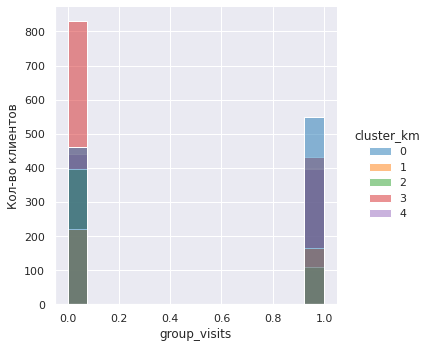

In [23]:
# Распределения булевых признаков
bool = data[['gender', 'near_location', 'partner','promo_friends', 'phone', 'group_visits']]
for b in bool:
    sns.set(font_scale=1)
    sns.displot(data, x=data[b], hue='cluster_km', palette="tab10", height=5, aspect=1)
    plt.ylabel("Кол-во клиентов")
    plt.show()    

Как видно по графику 'age' больше всего склонны к оттоку молодые люди до 30 лет(пик 28 лет у 3-го кластера), а надежные кластеры самые возрастные 0-й кластер на пике 32 года, 4-й на пике 30 лет.

Что касается дополнительных затрат - более надежные кластеры имеют более широкий график, большинство клиентов 3-го тратят меньше, далее 2-й и 3-й кластер.

Самый активный кластер 4-й, в среднем 3 посещения в неделю. Минимальная активность наблюдается у 3-го кластера, в среднем 1 занятие в неделю. Чем клиент активнее в теченеии недели посещает зал, тем меньше вероятность его оттока.

'Сontract_period' - здесь хорошо видно, что абонементы продаются на периоды 1,6,12 месяцев. Кластер "0" состоит преимущественно из годовых абонементов, и в нем нет тех у кого абонемент на 1 месяц и почти нет абонементов на 6 месяцев. Месячная посещаемость, в целом, схожа с динамикой посещений в неделю.

'Lifetime' - долгожителями здесь являются 0-й кластер. Самый ненадежный - кластер №3

2-й кластер составляют в основном люди, не живущие поблизости. 1-й кластер по-прежнему не хочет чтобы им звонили.

## Общие выводы и рекомендации 

В данном проекте были исследованы данные по посещению и оттоку клиентов фитнес-центра. Были изучены признаки, влияющие на отток посетителей, построены графики распределения признаков и матрица корреляции, которая показала влияние проведения промоакций и скидок на посещаемость.

Модели прогнозирования оттока методами логистической регрессии и случайного леса показали высокие значения метрик 'Accuracy'(>0.91), 'Precision' (>0.83), и 'Recall'(>0.81). Немного выше эти значения у логистической регрессии.

Была спрогнозирована кластеризация клиентов на основании алгоритма K-Means. В результате все клиенты фитнес-центра были распределены на 5 кластеров. Самая высокая доля оттока (51%) - кластер №3: молодые люди не старше 30 лет, записавшиеся на 1-2 месяца, посещающие 1 (реже 2) раза в неделю, с низкими затратами на дополнительные услуги. Их 'lifetime' - не дольше 3 месяцев. Самая низкая доля оттока (3%) - кластер №0: люди более старшего возраста (за 30 лет), воспользовавшиеся спецпредложениями и промоакциями, заключившие договор на год, занимающиеся не реже 2 раз в неделю и охотно пользующиеся дополнительными услугами.

На основании построенных моделей прогнозорования можно выделить две стратегии дальнейшего развития:

1) снижение оттока молодой аудитории - сделать клуб более привлекательным для молодежи: открыть группы более молодежной направленности, пересмотреть дополнительные услуги, разработать акции и скидки для молодежи (например, скидки для клиентов до 28 лет), изменить меню в кафе клуба, и т.п.

2) сконцентрироваться на удержании и привлечении более взрослой аудитории (к примеру, открыть семейные/детские группы, чтобы приходили всей семьей), устраивать семейные праздники фитнеса, предоставить больше скидок для тех, кто занимается всей семьей, и т.д.

Для новых клиентов нужно сделать дополнительные скидки на первое время, чтобы удержать их. Например, предложить только для новых клиентов абонемент на 1 месяц + месяц в подарок, возможность посетить платные и групповые занятия бесплатно, Для постоянных клиентов стоит создать программу лояльности, когда заработанные бонусы можо потратить на дополнительные услуги, и т.п.


